In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [26]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [27]:
import cutout_manager as cm
from jwst_plots import JWSTCatalog, make_cat_use

In [28]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


# Millimeter YSO Candidates

## Code from Nazar Budaiev

In [1]:
import astropy.units as u
import astropy.constants as c
def get_mass(flux, freq):
    return (flux * d**2 *(c.c**2)/ (2*kappa(freq)*freq**2*c.k_B*T)).to(u.Msun)
def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)



<>:6: SyntaxWarning: invalid escape sequence '\k'
<>:6: SyntaxWarning: invalid escape sequence '\k'
/scratch/local/55363331/ipykernel_737297/1697317454.py:6: SyntaxWarning: invalid escape sequence '\k'
  """


In [2]:
# Large Filament Core
B3freq = 92.45* u.GHz
kappaB3 = kappa(B3freq)
d = 5*u.kpc
T = 20*u.K
get_mass(0.7*u.mJy, B3freq)

<Quantity 9.19712802 solMass>

In [3]:
# Small Filament Core
B3freq = 92.45* u.GHz
kappaB3 = kappa(B3freq)
d = 5*u.kpc
T = 20*u.K
get_mass(0.4*u.mJy, B3freq)

<Quantity 5.25550173 solMass>

In [4]:
# Smudge
B3freq = 92.45* u.GHz
kappaB3 = kappa(B3freq)
d = 8.2*u.kpc
T = 20*u.K
get_mass(0.4*u.mJy, B3freq)

<Quantity 14.13519745 solMass>

In [5]:
# Cloud c2 core
B3freq = 92.45* u.GHz
kappaB3 = kappa(B3freq)
d = 8.2*u.kpc
T = 20*u.K
get_mass(1*u.mJy, B3freq)

<Quantity 35.33799362 solMass>

# IR YSO Candidates

In [12]:
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus
from photutils.aperture import ApertureStats
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

In [6]:
cand1 = SkyCoord('17:46:18.3752192438', '-28:38:23.6983619088', unit=(u.hourangle, u.deg))
cand2 = SkyCoord('17:46:16.6402575536', '-28:38:31.9988735466', unit=(u.hourangle, u.deg))

In [15]:
cutout_1_405 = cm.get_cutout_405(cand1, 5*u.arcsec, 5*u.arcsec)
cutout_2_405 = cm.get_cutout_405(cand2, 5*u.arcsec, 5*u.arcsec)

In [41]:
cutout_1_rgb, wcs_1 = cm.get_cutout_rgb(cand1, 5*u.arcsec, 5*u.arcsec)
cutout_2_rgb, wcs_2 = cm.get_cutout_rgb(cand2, 5*u.arcsec, 5*u.arcsec)

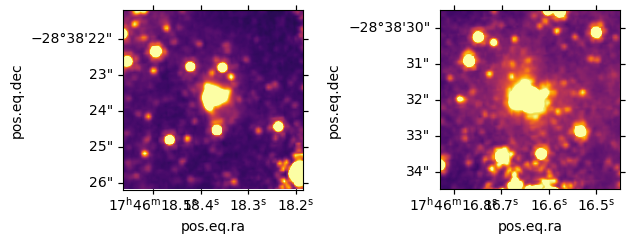

In [21]:
ax = plt.subplot(121, projection=cutout_1_405.wcs)
ax.imshow(cutout_1_405.data, origin='lower', cmap='inferno', vmin=0, vmax=100)

ax = plt.subplot(122, projection=cutout_2_405.wcs)
ax.imshow(cutout_2_405.data, origin='lower', cmap='inferno', vmin=0, vmax=100)

plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


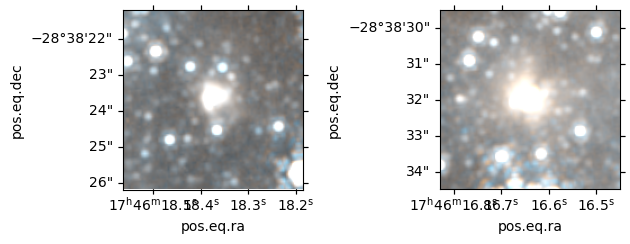

In [43]:
ax = plt.subplot(121, projection=wcs_1)
ax.imshow(cutout_1_rgb, origin='lower', cmap='inferno')

ax = plt.subplot(122, projection=wcs_2)
ax.imshow(cutout_2_rgb, origin='lower', cmap='inferno')

plt.tight_layout()

In [39]:
mag_405 = 13.524
mag_187 = 16.5
mag_466 = 13.499
mag_212 = 15.5
from dust_extinction.averages import CT06_MWGC

In [25]:
(mag_187-mag_405)/(CT06_MWGC()(1.87*u.um)-CT06_MWGC()(4.05*u.um))

35.230122102554176

In [29]:
cat_use = make_cat_use()

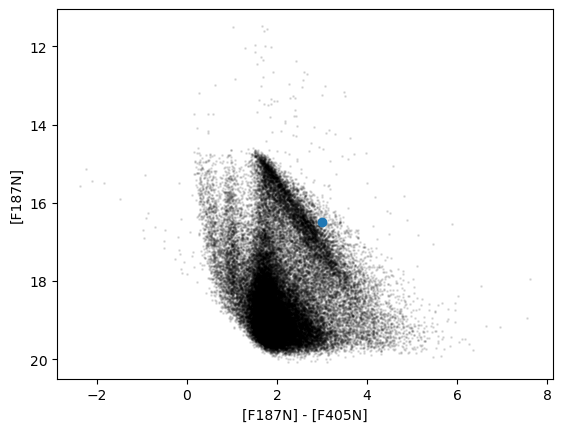

In [31]:
cat_use.plot_CMD('f187n', 'f405n', 'f187n', s=1, color='k', alpha=0.1)
plt.scatter(mag_187-mag_405, mag_187)

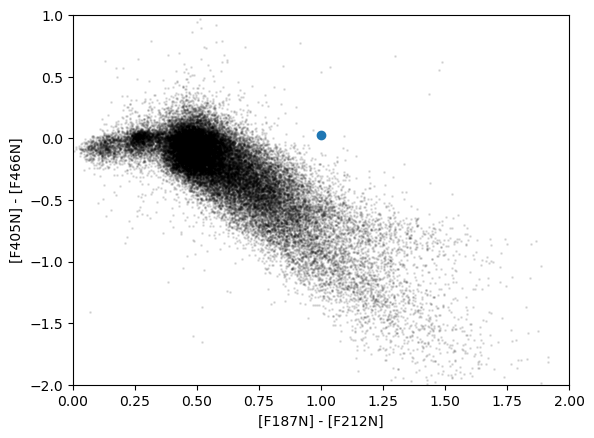

In [40]:
ax = plt.subplot(111)
cat_use.plot_CCD('f187n', 'f212n', 'f405n', 'f466n', s=1, color='k', alpha=0.1, ax=ax)
ax.set_xlim(0, 2)
ax.set_ylim(-2, 1)

ax.scatter(mag_187-mag_212, mag_405-mag_466)